In [1]:
import numpy as np

y = np.array([0, 1, 2, 2])

In [2]:
y_enc = (np.arange(np.max(y) + 1) == y[:, None]).astype(float)

print('one-hot encoding:\n', y_enc)

one-hot encoding:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [3]:
X = np.array([[0.1, 0.5],
              [1.1, 2.3],
              [-1.1, -2.3],
              [-1.5, -2.5]])

W = np.array([[0.1, 0.2, 0.3],
              [0.1, 0.2, 0.3]])

bias = np.array([0.01, 0.1, 0.1])

print('Inputs X:\n', X)
print('\nWeights W:\n', W)
print('\nbias:\n', bias)

Inputs X:
 [[ 0.1  0.5]
 [ 1.1  2.3]
 [-1.1 -2.3]
 [-1.5 -2.5]]

Weights W:
 [[0.1 0.2 0.3]
 [0.1 0.2 0.3]]

bias:
 [0.01 0.1  0.1 ]


In [4]:
def net_input(X, W, b):
    return (X.dot(W) + b)

net_in = net_input(X, W, bias)
print('net input:\n', net_in)

net input:
 [[ 0.07  0.22  0.28]
 [ 0.35  0.78  1.12]
 [-0.33 -0.58 -0.92]
 [-0.39 -0.7  -1.1 ]]


In [5]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

smax = softmax(net_in)
print('softmax:\n', smax)

softmax:
 [[0.29450637 0.34216758 0.36332605]
 [0.21290077 0.32728332 0.45981591]
 [0.42860913 0.33380113 0.23758974]
 [0.44941979 0.32962558 0.22095463]]


In [6]:
def to_classlabel(z):
    return z.argmax(axis=1)

print('predicted class labels: ', to_classlabel(smax))
# As we can see, our predictions are terribly wrong, since the correct class labels are [0, 1, 2, 2]

predicted class labels:  [2 2 0 0]


In [7]:
def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

xent = cross_entropy(smax, y_enc)
print('Cross Entropy:', xent)

Cross Entropy: [1.22245465 1.11692907 1.43720989 1.50979788]


In [8]:
def cost(output, y_target):
    return np.mean(cross_entropy(output, y_target))

J_cost = cost(smax, y_enc)
print('Cost: ', J_cost)

Cost:  1.3215978715930938


## Example 1 - Gradient Descent

Iteration: 500/500 | Cost 0.06 | Elapsed: 0:00:00 | ETA: 0:00:00

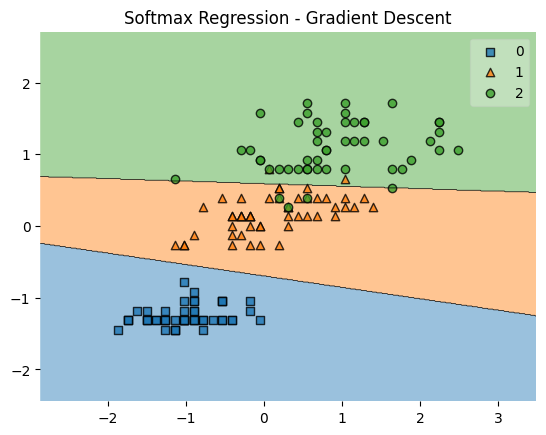

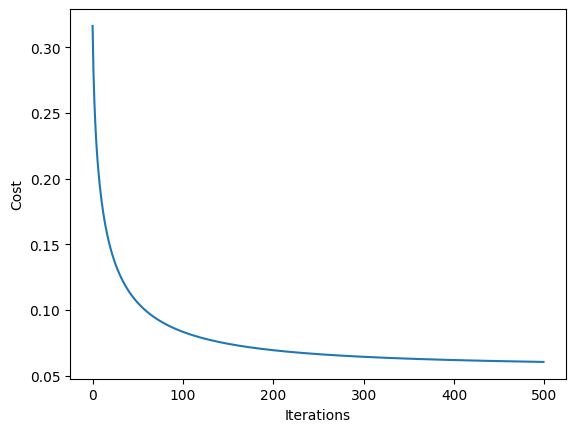

In [9]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import SoftmaxRegression
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

lr = SoftmaxRegression(eta=0.01, 
                       epochs=500, 
                       minibatches=1, 
                       random_seed=1,
                       print_progress=3)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression - Gradient Descent')
plt.show()

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [10]:
y_pred = lr.predict(X)
print('Last 3 Class Labels: %s' % y_pred[-3:])

Last 3 Class Labels: [2 2 2]


In [11]:
y_pred = lr.predict_proba(X)
print('Last 3 Class Labels:\n %s' % y_pred[-3:])

Last 3 Class Labels:
 [[9.18728149e-09 1.68894679e-02 9.83110523e-01]
 [2.97052325e-11 7.26356627e-04 9.99273643e-01]
 [1.57464093e-06 1.57779528e-01 8.42218897e-01]]


## Example 2 - Stochastic Gradient Descent


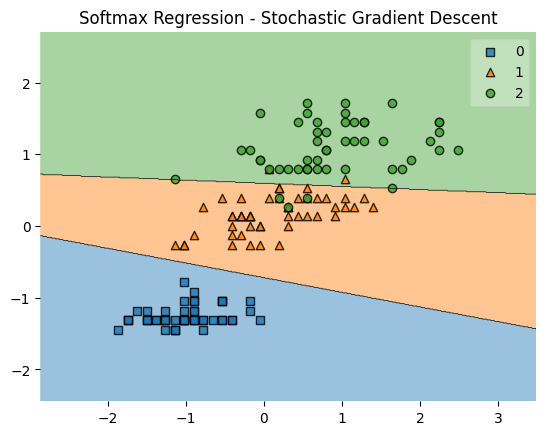

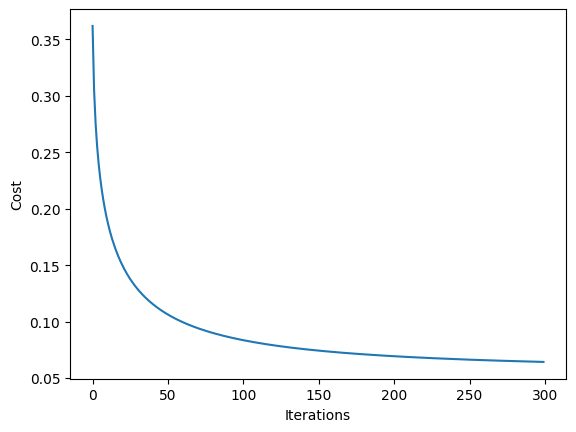

In [12]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import SoftmaxRegression
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

lr = SoftmaxRegression(eta=0.01, epochs=300, minibatches=len(y), random_seed=1)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression - Stochastic Gradient Descent')
plt.show()

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])